<h1><center>Laboratorio 1 Data Science</center></h1>
<h2><center>Catedrático Ing Luis Furlan</center></h2>
<h3><center>Realizado por:</center></h3>
<h3><center>David Cuellar 18382, Augusto Alonso</center></h3>
<h3><center>Grupo #6</center></h3>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

## Nota
Dado que en la clase no hemos abarcado temas como PCA y reglas de asociación, con la autorización de Furlan no vamos a realizar esta parte del laboratorio,
además se decidio trabajar con el dataset de train porque es el más grande

# 1. Descripcion de las variables

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train.info()
lista = ["Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Categorica","Categorica","Categorica","Categorica",
	"Categorica","Categorica","Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua",
	"Cuantitativa continua","Categorica","Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua",
	"Cuantitativa continua","Cuantitativa continua","Cuantitativa discreta","Cuantitativa discreta","Cuantitativa discreta",
	"Cuantitativa discreta","Cuantitativa discreta","Cuantitativa discreta","Categorica","Cuantitativa discreta",
	"Categorica","Cuantitativa discreta","Categorica","Categorica","Cuantitativa continua","Categorica",
	"Cuantitativa continua","Cuantitativa continua", "Categorica","Categorica","Categorica","Cuantitativa continua",
	"Cuantitativa continua","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua",
	"Categorica","Categorica","Categorica","Cuantitativa continua","Cuantitativa continua","Cuantitativa continua",
	"Categorica","Categorica","Cuantitativa continua"]

In [5]:
df = pd.DataFrame(train.dtypes)

In [6]:
df["Tipo de variable"] = lista
df.columns = ["Tipo de objeto en python","Tipo de variable"]
df.head()

,Tipo de objeto en python,Tipo de variable
Id,int64,Categorica
MSSubClass,int64,Categorica
MSZoning,object,Categorica
LotFrontage,float64,Cuantitativa continua
LotArea,int64,Cuantitativa continua


In [7]:
df.to_excel("datatype.xlsx")

In [8]:
df.loc[df["Tipo de variable"] != "Categorica"].index

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df.loc[df["Tipo de variable"] == "Categorica"].index

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

# 2. Analisis exploratorio rapido

In [10]:
train.shape

(1460, 81)

In [11]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
cuantitatives = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
cualitatives = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
print(len(cuantitatives))
print(len(cualitatives))

33
48


## El dataset se compone de 1460 registros y 80 variables
## La distribución de variables en el dataset es la siguiente:
### -  33 variables cuantitativas
### -  47 variables cualitativas (No se toma en cuenta el id)


# 3. Analisis de correlacion entre variables cuantitativas

In [13]:

cuantitative_df = train.loc[:,cuantitatives] 
cuantitative_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

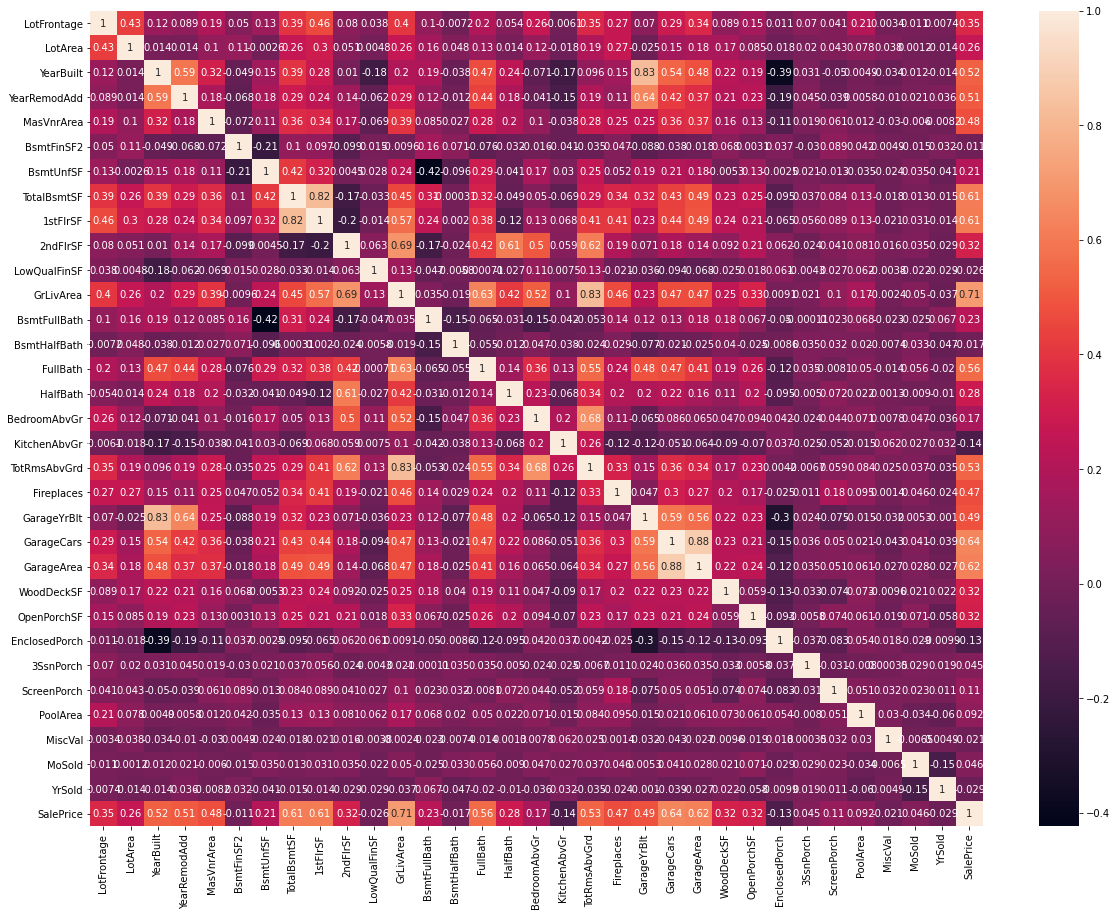

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(cuantitative_df.corr(), annot = True)

### Con base a la gráfica de arriba se decidieron hacer scatter plots solamente de las variables que tienen una correlación mayor a 0.8

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

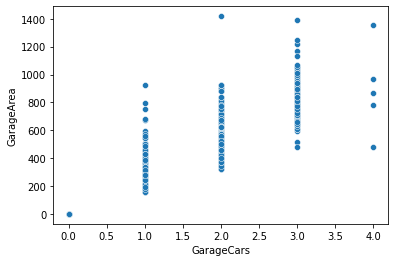

In [15]:
sns.scatterplot(data = cuantitative_df,x = 'GarageCars', y = 'GarageArea')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>

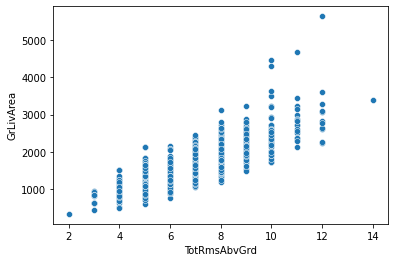

In [16]:
sns.scatterplot(data = cuantitative_df,x = 'TotRmsAbvGrd', y = 'GrLivArea')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

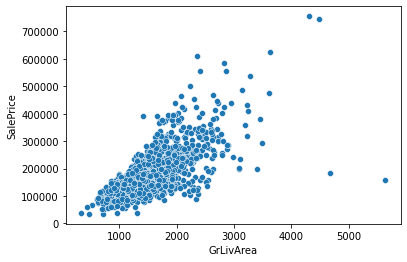

In [17]:
sns.scatterplot(data = cuantitative_df,x = 'GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='1stFlrSF'>

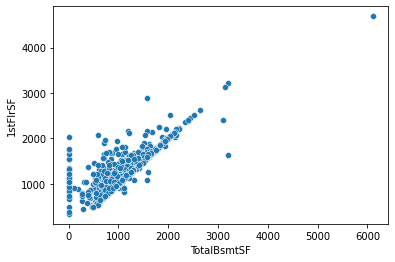

In [18]:
sns.scatterplot(data = cuantitative_df,x = 'TotalBsmtSF', y = '1stFlrSF')

# Histogramas

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>]], dtype=object)

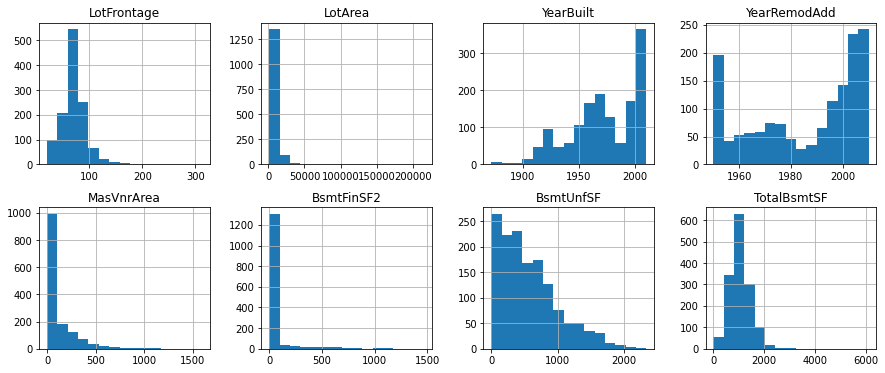

In [19]:
cuantitative_df.iloc[:,0:8].hist(bins=15, figsize=(15, 6), layout=(2, 4))

array([[<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>]], dtype=object)

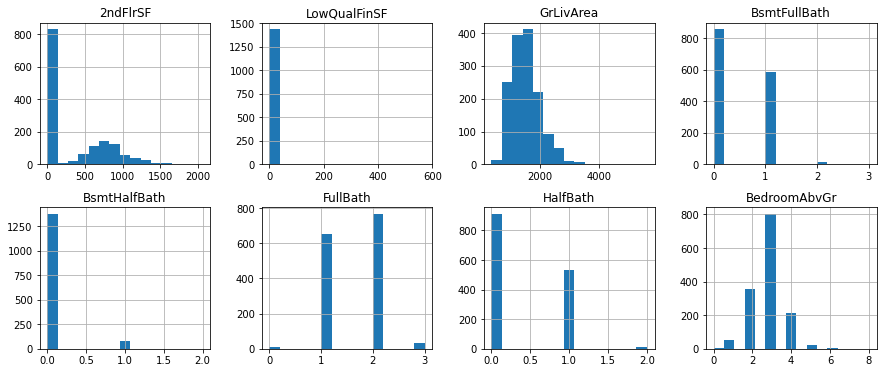

In [20]:
cuantitative_df.iloc[:,9:17].hist(bins=15, figsize=(15, 6), layout=(2, 4))

array([[<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>]], dtype=object)

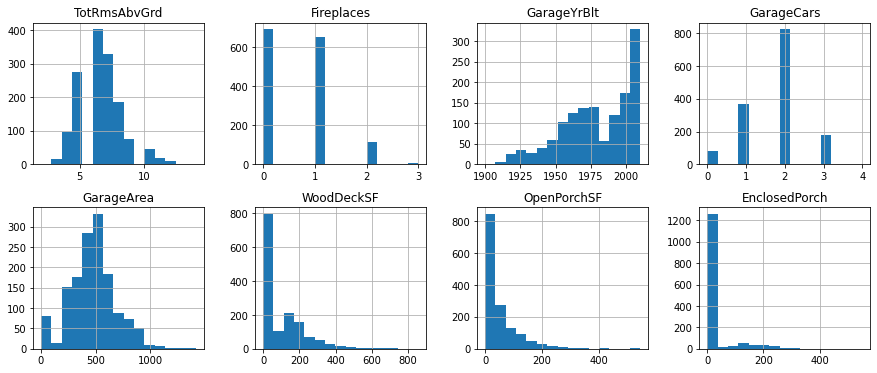

In [21]:
cuantitative_df.iloc[:,18:26].hist(bins=15, figsize=(15, 6), layout=(2, 4))

array([[<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal'}>,
        <AxesSubplot:title={'center':'MoSold'}>],
       [<AxesSubplot:title={'center':'YrSold'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

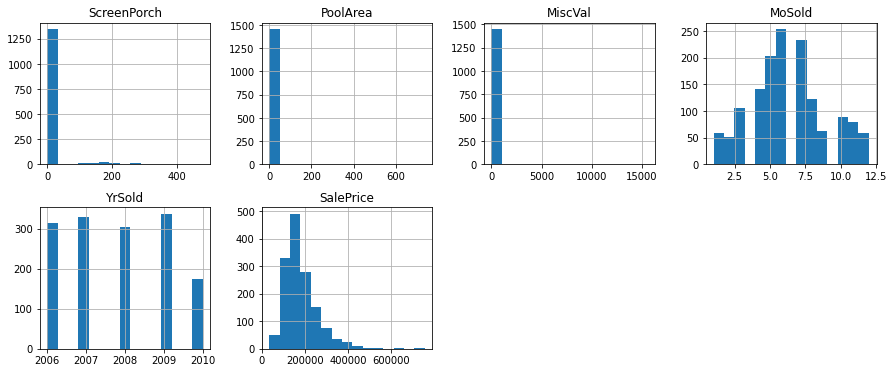

In [22]:
cuantitative_df.iloc[:,27:33].hist(bins=15, figsize=(15, 6), layout=(2, 4))

# Boxplots

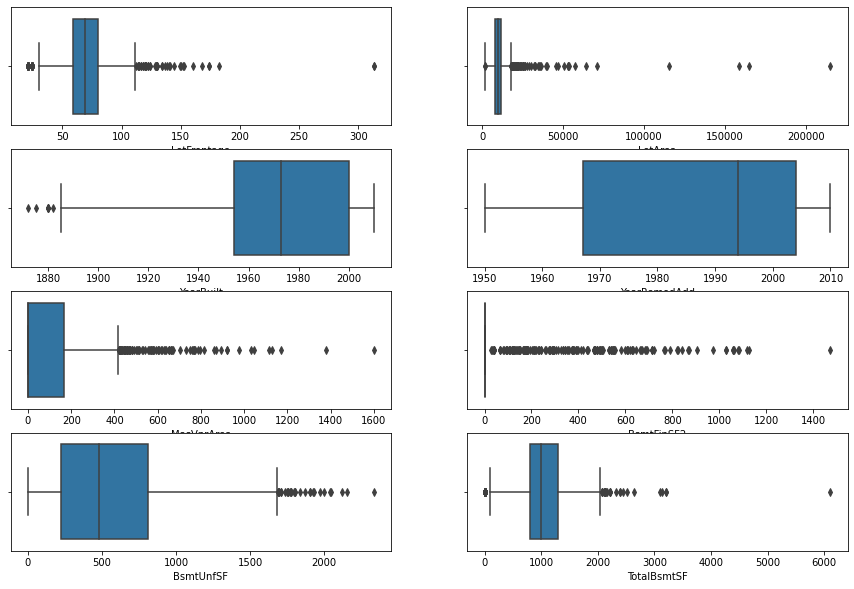

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
for var, subplot in zip(cuantitatives[0:8], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

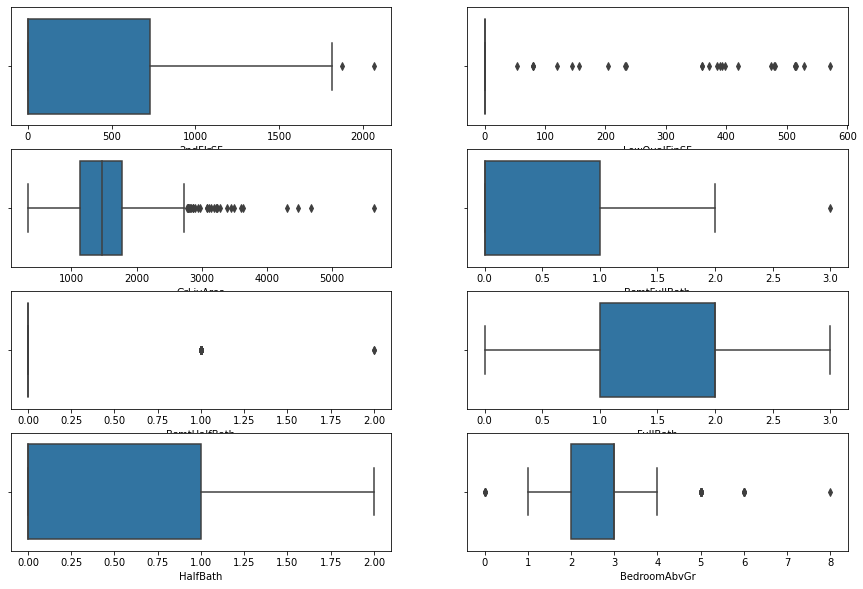

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
for var, subplot in zip(cuantitatives[9:17], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

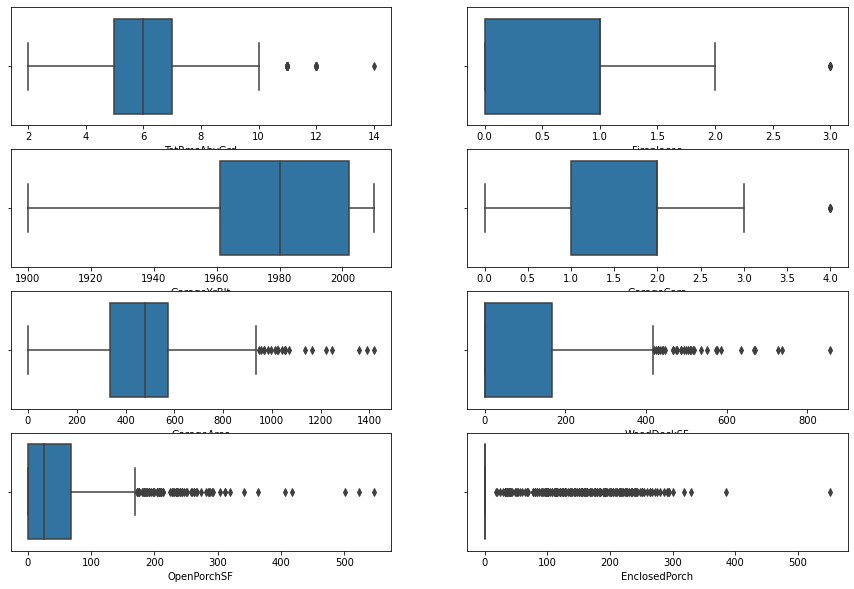

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
for var, subplot in zip(cuantitatives[18:26], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

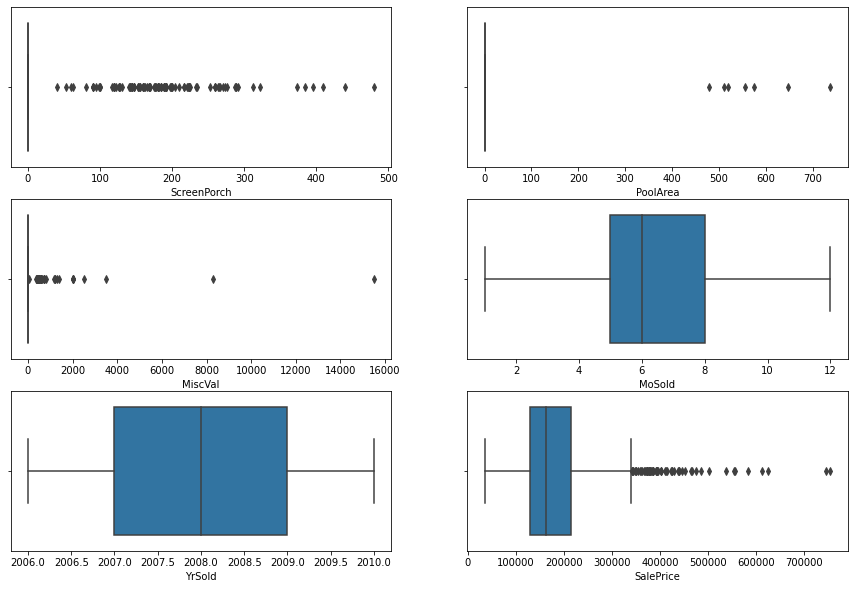

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(cuantitatives[27:33], ax.flatten()):
    sns.boxplot(x=var, data=cuantitative_df, ax=subplot)

# 4. Exploring categorical data

In [27]:
cualitative_df = train.loc[:,cualitatives[1:]] 
cualitative_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

# Barplots

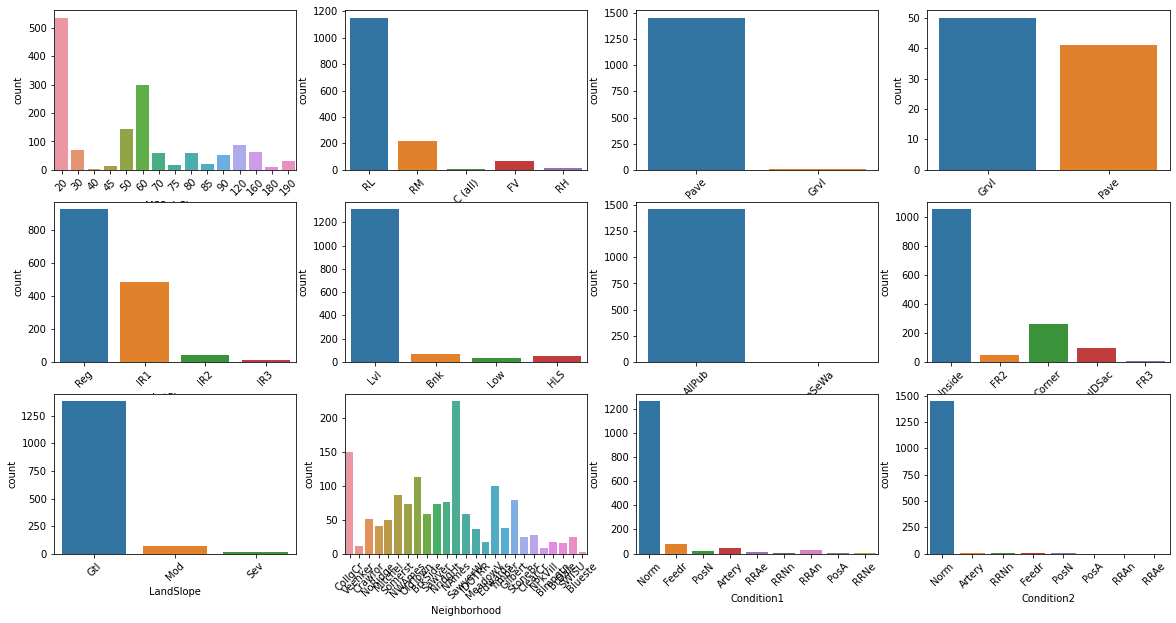

In [28]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[1:13], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

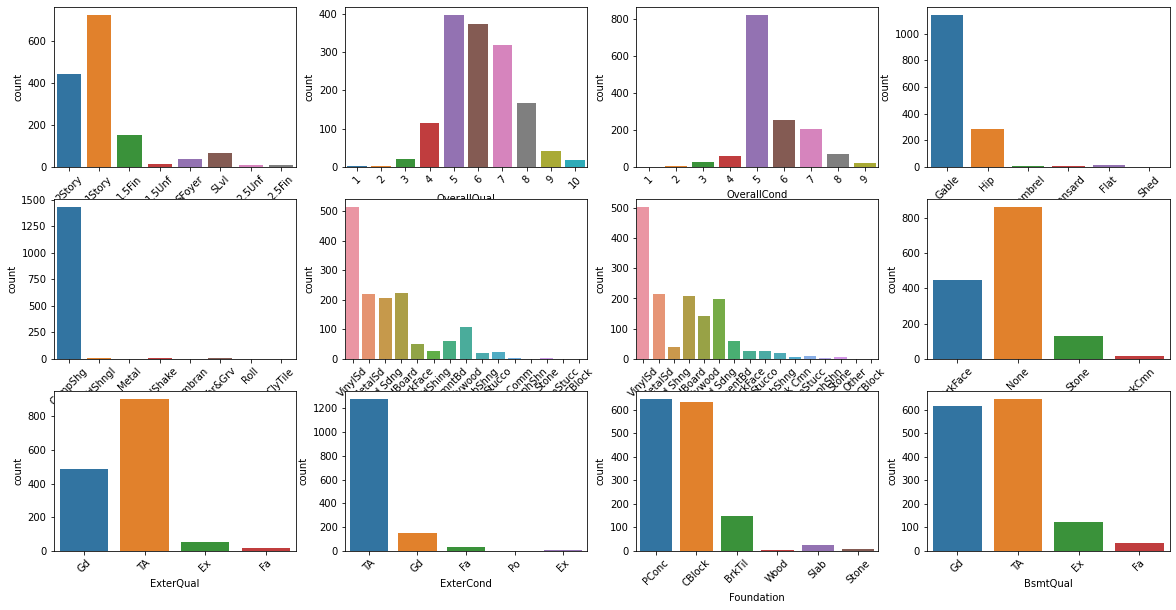

In [29]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[14:26], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

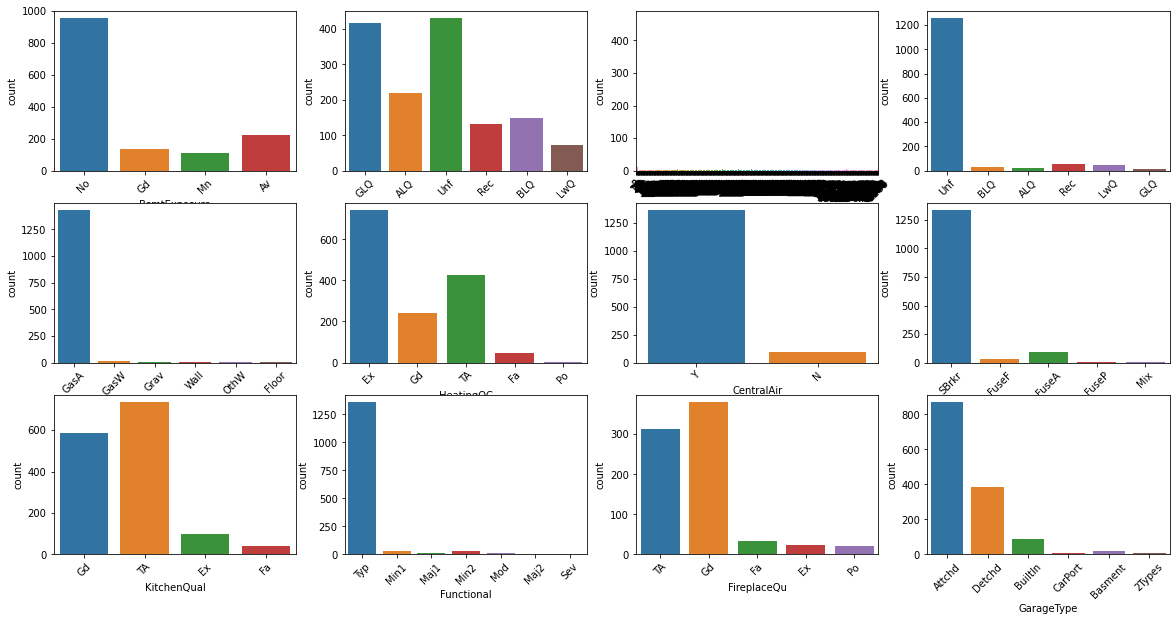

In [30]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[27:39], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

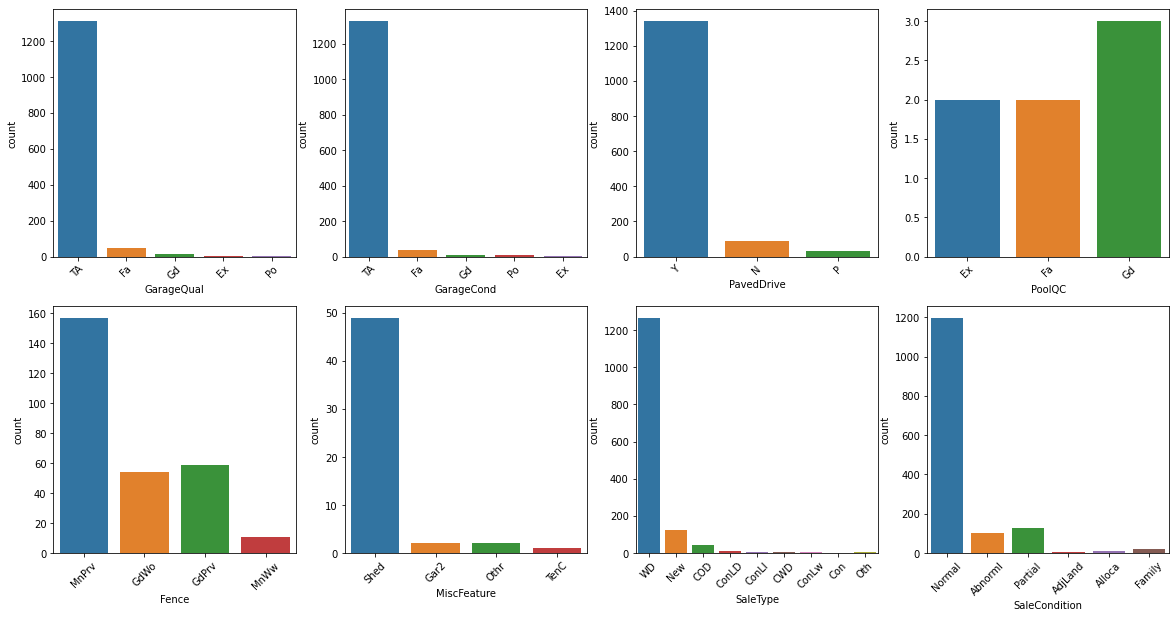

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[40:], ax.flatten()):
    sns.countplot(x = variable, data = cualitative_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

# Pie plots

C:\Users\angel\anaconda3\envs\cenv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


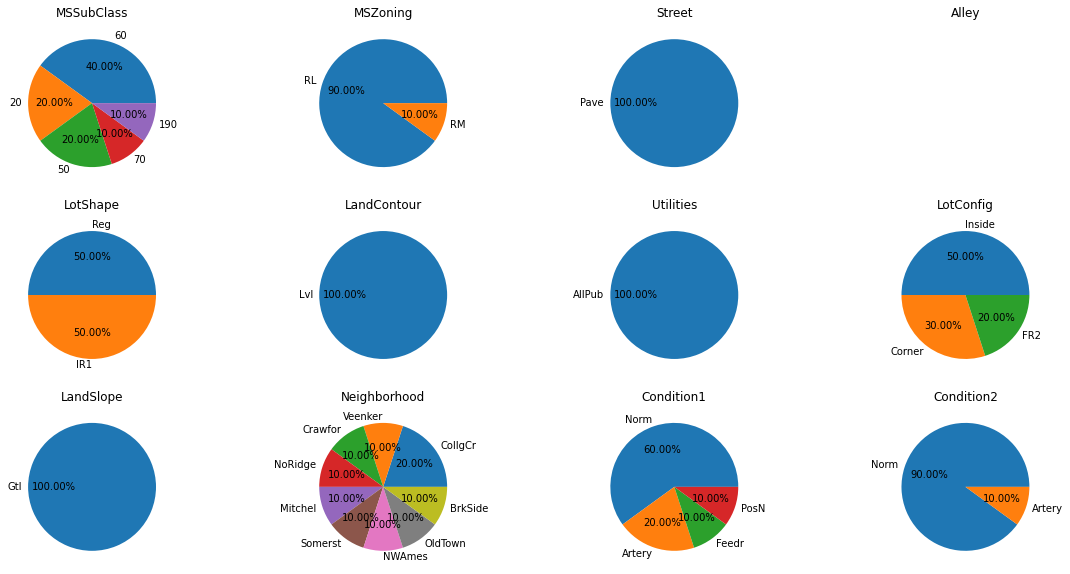

In [44]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[1:13], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

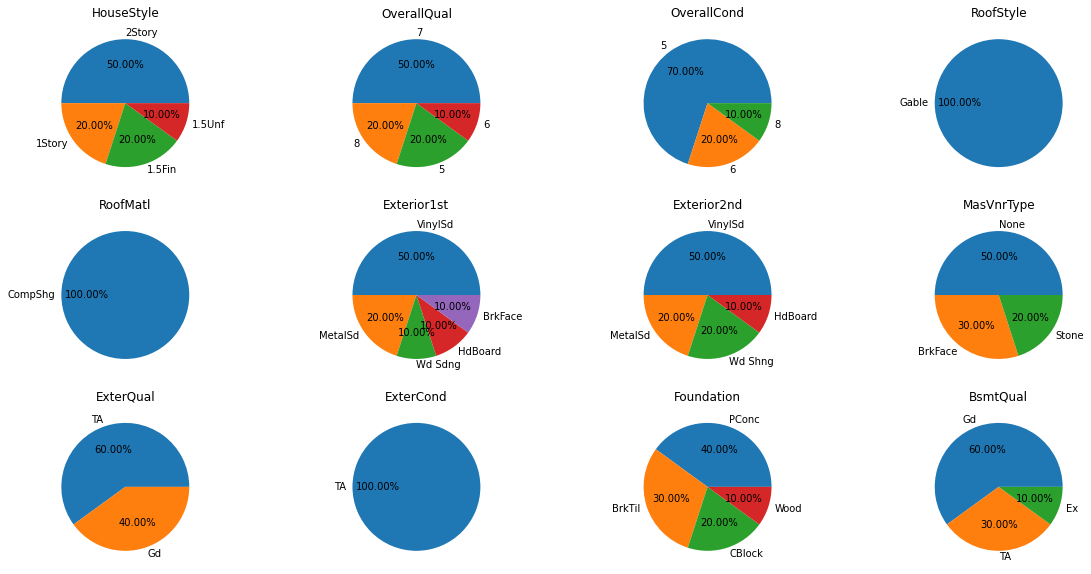

In [45]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[14:26], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

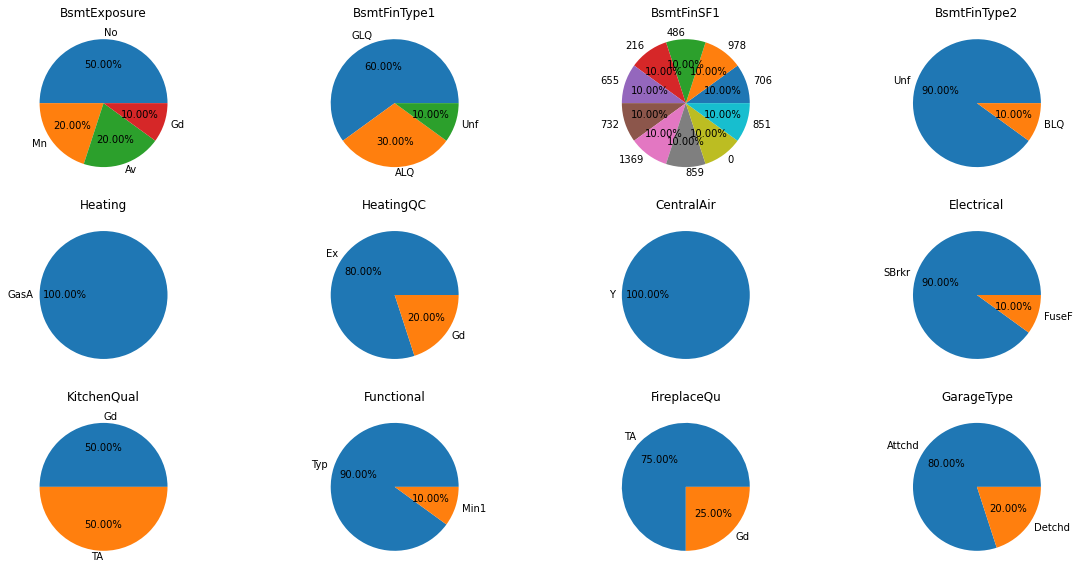

In [46]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[27:39], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

C:\Users\angel\anaconda3\envs\cenv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


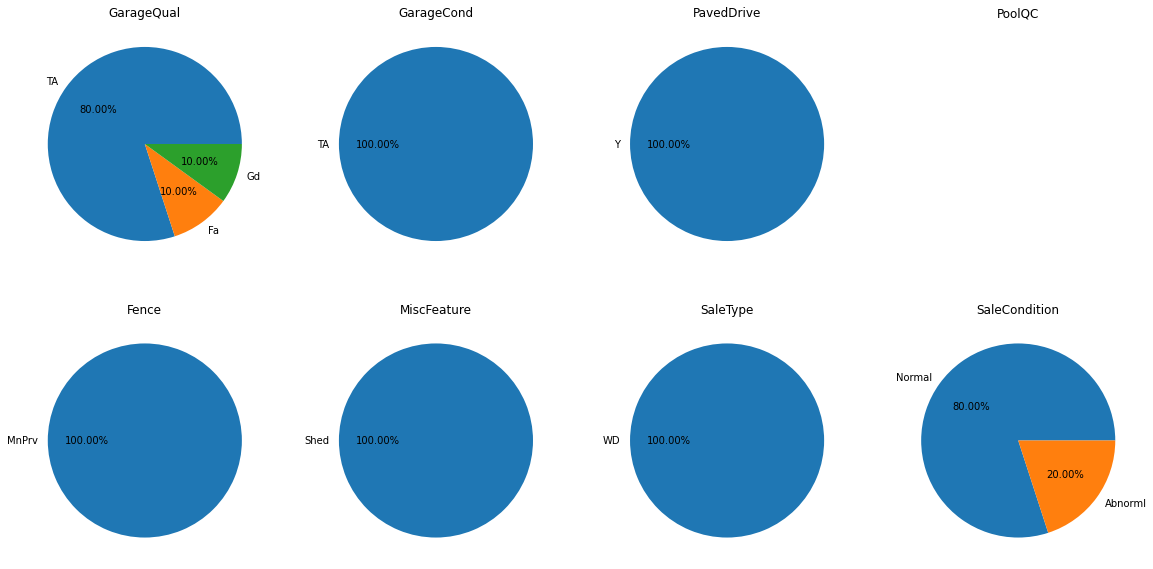

In [47]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cualitatives[40:], ax.flatten()):
    datos = cualitative_df[variable][:10].value_counts()
    subplot.pie(datos,labels=datos.index,autopct='%1.2f%%')
    subplot.set_title(variable)

# Hallazgos y conclusiones